In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [136]:
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\Sales_cars_Time_Series.xlsx",index_col='Month',parse_dates = True)
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<AxesSubplot:xlabel='Month'>

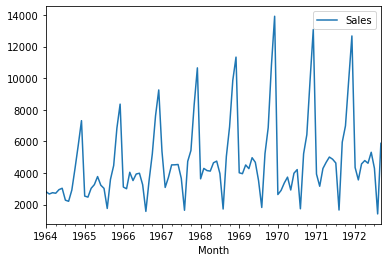

In [137]:
df.plot()

In [138]:
df=df[0:365]

In [139]:
# Moving average
df_mean=df.rolling(window=10).mean()

<AxesSubplot:xlabel='Month'>

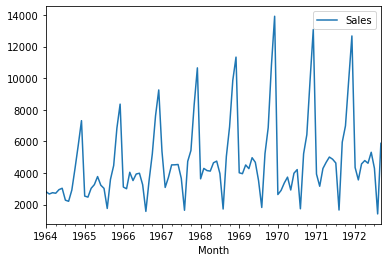

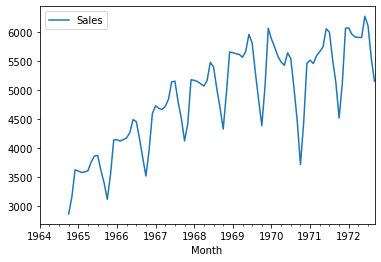

In [140]:
df.plot()
df_mean.plot()

In [141]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

In [142]:
def test(Sales):
    result = adfuller(Sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Data has no unit root and is stationary")
    else:
        print("indicating it is non-stationary ")

In [143]:
test(df['Sales'])

ADF Test Statistic : -1.8335930563276175
p-value : 0.3639157716602477
#Lags Used : 11
Number of Observations Used : 93
indicating it is non-stationary 


In [144]:
df_t=pd.concat([df,df.shift(1)],axis=1)

In [145]:
df_t.columns=['Acutal_birth','Forecast_birth']

In [146]:
df_t=df_t[1:]

In [147]:
df_t_error=mean_squared_error(df_t.Acutal_sales,df_t.Forecast_sales)

In [148]:
df_t_error

6960925.788461538

In [149]:
df_t.head()

,Acutal_birth,Forecast_birth
Month,,
1964-02-01,2672,2815.0
1964-03-01,2755,2672.0
1964-04-01,2721,2755.0
1964-05-01,2946,2721.0
1964-06-01,3036,2946.0


In [150]:
# Perform differencing to make the data stationary
df['stationary_data'] = df['Sales'].diff()

<ipython-input-150-eba5a9349d8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stationary_data'] = df['Sales'].diff()


In [151]:
# Drop the first row since differencing results in a NaN value
df = df.dropna()

In [152]:
df

,Sales,stationary_data
Month,,
1964-02-01,2672,-143.0
1964-03-01,2755,83.0
1964-04-01,2721,-34.0
1964-05-01,2946,225.0
1964-06-01,3036,90.0
...,...,...
1972-05-01,4618,-170.0
1972-06-01,5312,694.0
1972-07-01,4298,-1014.0


In [153]:
# Maam's method
# df['Sales_FD'] = df['Sales'] - df['Sales'].shift(12)

In [154]:
def test(stationary_data):
    result = adfuller(stationary_data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Data has no unit root and is stationary")
    else:
        print("indicating it is non-stationary ")

In [155]:
test(df['stationary_data'])

ADF Test Statistic : -7.1898964480509955
p-value : 2.5196204473871266e-10
#Lags Used : 11
Number of Observations Used : 92
Data has no unit root and is stationary


In [156]:
df = df.drop('Sales', axis=1)

In [157]:
df

,stationary_data
Month,
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
1964-06-01,90.0
...,...
1972-05-01,-170.0
1972-06-01,694.0
1972-07-01,-1014.0


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


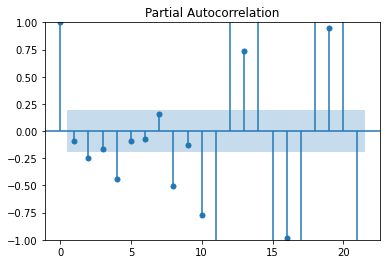

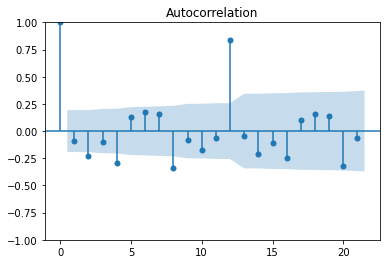

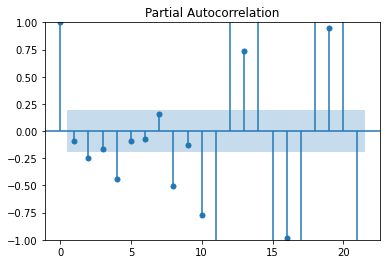

In [158]:
#ARIMA (Auto Regressive Integrated Moving Average)
#Auto Regressive -Current vlaue correlated with previous value (p)
#Integreted - d To make time series stationary (d)
#Movin average -smoothing by removing the error/noise in the data (q)

# Finding the parameters (p,d,q)
plot_acf(df) # To identify the value of Q
plot_pacf(df) # To identify the value of p

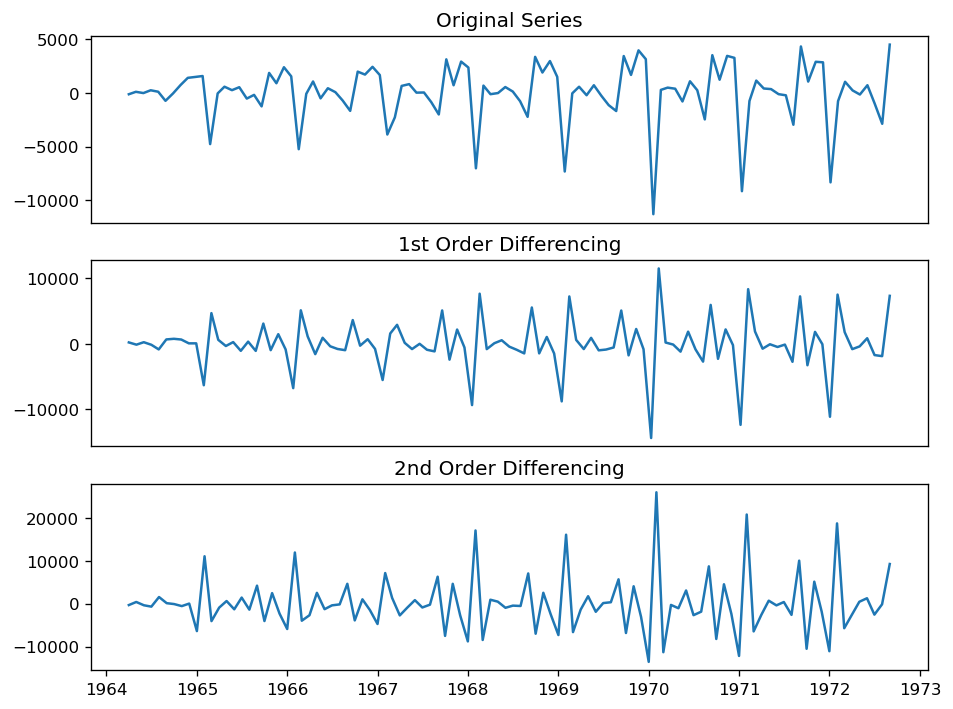

In [165]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.stationary_data); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.stationary_data.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.stationary_data.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

In [166]:
df['stationary_data'] = df.stationary_data.diff()
df.dropna(inplace = True)

In [170]:
##creating a function for values
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", round(dftest[1],6))
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calcul")
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
        if dftest[0] < dftest[4]["5%"]:
            print ("Reject Ho - Time Series is Stationary")
        else:
                print ("Failed to Reject Ho - Time Series is Non-Stationary")
adf_test(df['stationary_data'])

1. ADF :  -7.924774524373965
2. P-Value :  0.0
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calcul
5. Critical Values :
	 1% :  -3.506057133647011
Reject Ho - Time Series is Stationary
	 5% :  -2.8946066061911946
Reject Ho - Time Series is Stationary
	 10% :  -2.5844100201994697
Reject Ho - Time Series is Stationary


In [171]:
#using gridserach to find (p,d,q)
from pmdarima import auto_arima
auto_arima(df, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1999.048, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1980.449, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1997.062, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1966.228, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1966.487, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1964.233, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1978.457, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1964.492, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 A

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [199]:
train=df[0:68]
test=df[68:]

In [200]:
from statsmodels.tsa.arima.model import ARIMA

In [201]:
model=ARIMA(train,order=(2,1,3))
predictor=model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converg

In [202]:
predictor.aic

1243.7692999490253

In [203]:
predictor_fc=predictor.forecast(steps=35)

In [204]:
predictor_fc

1969-11-01   -2106.733482
1969-12-01     639.447778
1970-01-01    -159.274241
1970-02-01      70.512293
1970-03-01       5.630469
1970-04-01      23.347296
1970-05-01      18.811655
1970-06-01      19.816241
1970-07-01      19.680273
1970-08-01      19.643396
1970-09-01      19.691183
1970-10-01      19.659405
1970-11-01      19.677245
1970-12-01      19.667930
1971-01-01      19.672617
1971-02-01      19.670307
1971-03-01      19.671432
1971-04-01      19.670888
1971-05-01      19.671150
1971-06-01      19.671024
1971-07-01      19.671085
1971-08-01      19.671056
1971-09-01      19.671070
1971-10-01      19.671063
1971-11-01      19.671066
1971-12-01      19.671065
1972-01-01      19.671065
1972-02-01      19.671065
1972-03-01      19.671065
1972-04-01      19.671065
1972-05-01      19.671065
1972-06-01      19.671065
1972-07-01      19.671065
1972-08-01      19.671065
1972-09-01      19.671065
Freq: MS, Name: predicted_mean, dtype: float64

In [205]:
train.tail()

,stationary_data
Month,
1969-06-01,-983.0
1969-07-01,-863.0
1969-08-01,-548.0
1969-09-01,5103.0
1969-10-01,-1751.0


In [206]:
test.head()

,stationary_data
Month,
1969-11-01,2281.0
1969-12-01,-818.0
1970-01-01,-14390.0
1970-02-01,11537.0
1970-03-01,211.0


In [207]:
df_pc_error = mean_squared_error(test,predictor_fc)

In [208]:
df_pc_error

27483126.269036546

### OPTIONAL

In [214]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [215]:
Decomp_results = seasonal_decompose(df)

<AxesSubplot:xlabel='Month', ylabel='Resid'>

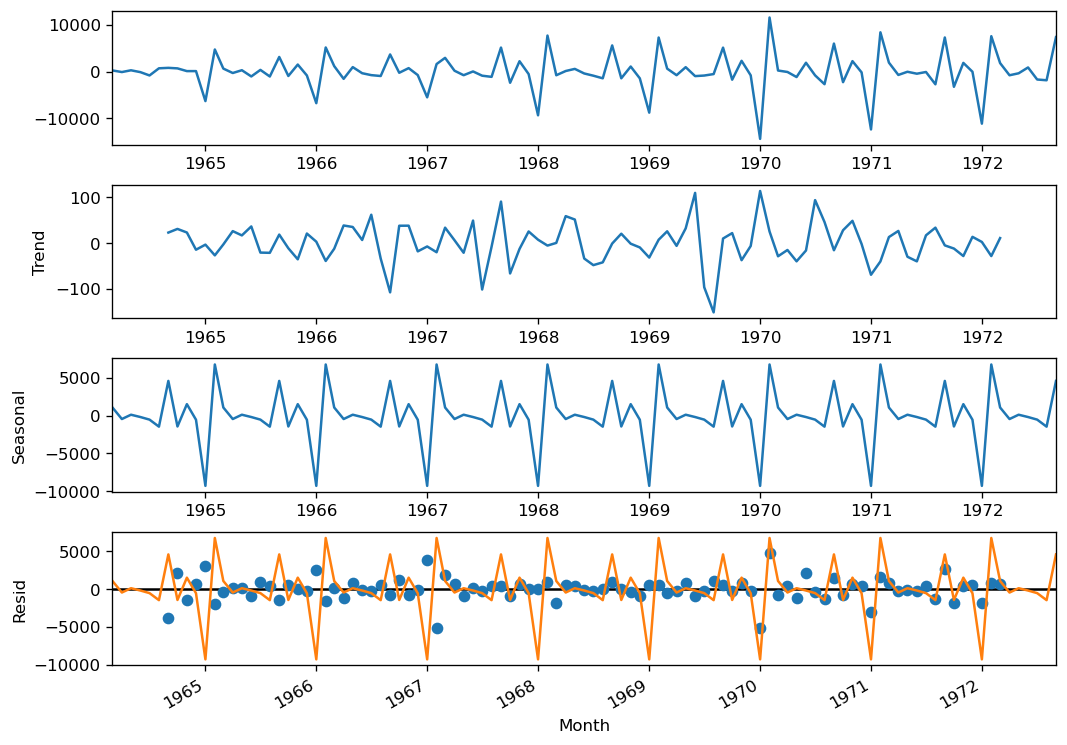

In [216]:
# Residual is combination of trend and seasonality

Decomp_results.plot()
Decomp_results.seasonal.plot()

In [ ]:
#D means daily
df.index.freq = 'D'
df.dropna(inplace = True)